<a href="https://colab.research.google.com/github/Sidhtang/HOME..LLC/blob/main/ASsignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

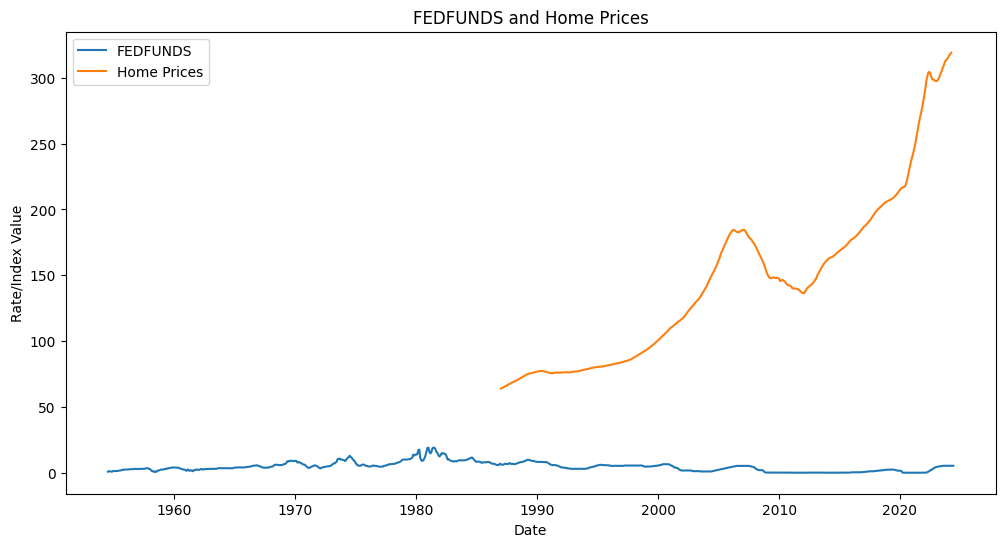

In [ ]:
# @title Data visualisation AND data cleaning
import pandas as pd
import matplotlib.pyplot as plt

# Load FEDFUNDS and S&P Case-Schiller Home Price Index data
fedfunds_data = pd.read_csv('FEDFUNDS.csv', index_col='DATE', parse_dates=['DATE'])
home_price_data = pd.read_csv('CSUSHPISA.csv', index_col='DATE', parse_dates=['DATE'])

# Plot FEDFUNDS and home prices
plt.figure(figsize=(12, 6))
plt.plot(fedfunds_data.index, fedfunds_data['FEDFUNDS'], label='FEDFUNDS')
plt.plot(home_price_data.index, home_price_data['CSUSHPISA'], label='Home Prices')
plt.xlabel('Date')
plt.ylabel('Rate/Index Value')
plt.title('FEDFUNDS and Home Prices')
plt.legend()
plt.show()

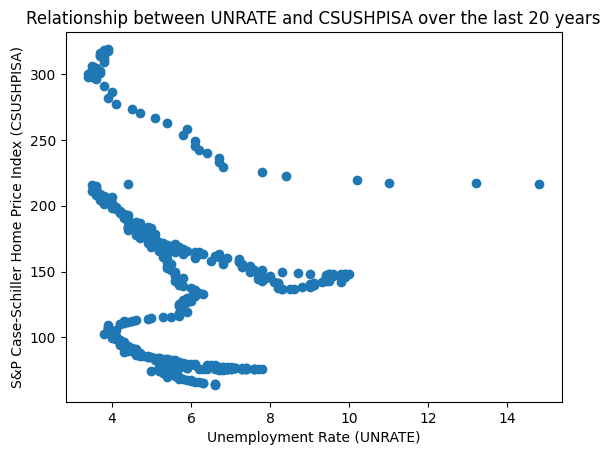

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
unrate = pd.read_csv('/content/UNRATE.csv')
csushpisa = pd.read_csv('/content/CSUSHPISA.csv')

# Merge the data
data = pd.merge(unrate, csushpisa, on='DATE')

# Plot the data
plt.scatter(data['UNRATE'], data['CSUSHPISA'])
plt.xlabel('Unemployment Rate (UNRATE)')
plt.ylabel('S&P Case-Schiller Home Price Index (CSUSHPISA)')
plt.title('Relationship between UNRATE and CSUSHPISA over the last 20 years')
plt.show()

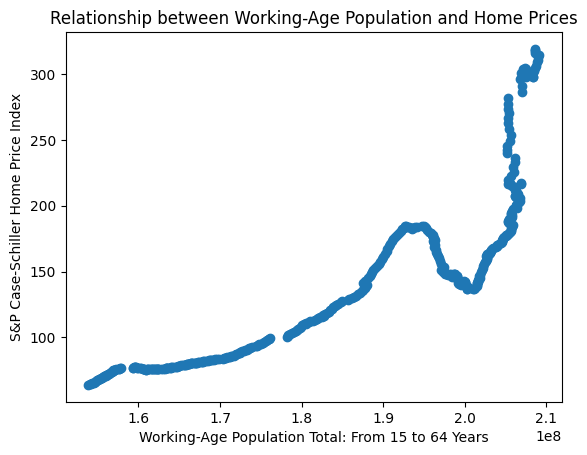

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
lfwa64ttusm647s = pd.read_csv('/content/working age.csv')
csushpisa = pd.read_csv('/content/CSUSHPISA.csv')

# Merge the data
data = pd.merge(lfwa64ttusm647s, csushpisa, on='DATE')

# Plot the data
plt.scatter(data['LFWA64TTUSM647S'], data['CSUSHPISA'])
plt.xlabel('Working-Age Population Total: From 15 to 64 Years')
plt.ylabel('S&P Case-Schiller Home Price Index')
plt.title('Relationship between Working-Age Population and Home Prices')
plt.show()

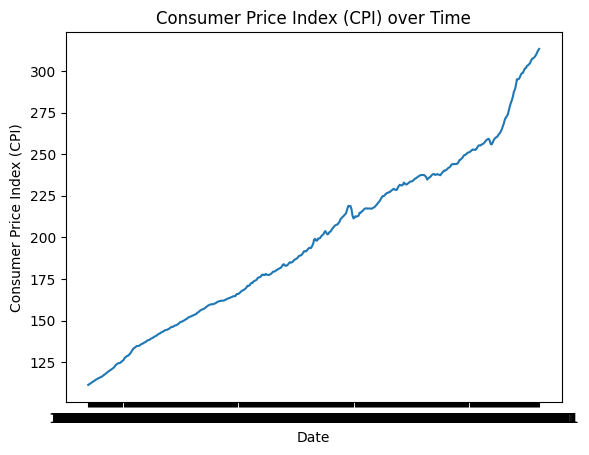

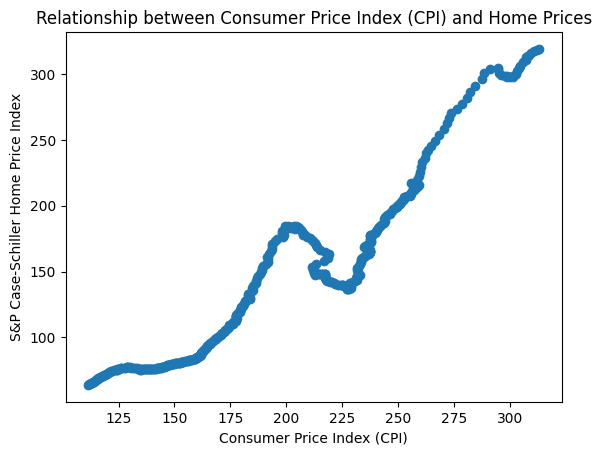

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
cpiaucsl = pd.read_csv('/content/CPIAUCSL.csv')
csushpisa = pd.read_csv('/content/CSUSHPISA.csv')

# Merge the data based on the 'DATE' column, keeping only the common dates
# This ensures that both resulting arrays have the same length
data = pd.merge(cpiaucsl, csushpisa, on='DATE')

# Plot the data using the merged dataframe
plt.plot(data['DATE'], data['CPIAUCSL'])
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.title('Consumer Price Index (CPI) over Time')
plt.show()

plt.scatter(data['CPIAUCSL'], data['CSUSHPISA'])
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('S&P Case-Schiller Home Price Index')
plt.title('Relationship between Consumer Price Index (CPI) and Home Prices')
plt.show()

In [ ]:
#my aim is to create different machine learning model anf to check
#which model is best for the data
#based on its mse and R^2

In [ ]:
# @title Model creaation


#building a linear regression model
#Let's build a Linear Regression model to analyze the relationship between the S&P Case-Schiller Home Price Index and the FEDFUNDS rate, as well as other factors that influence US home prices.

In [ ]:
# @title Linear regression model
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
home_price_data = pd.read_csv('CSUSHPISA.csv', index_col='DATE', parse_dates=['DATE'])
fedfunds_data = pd.read_csv('FEDFUNDS.csv', index_col='DATE', parse_dates=['DATE'])
unemployment_data = pd.read_csv('UNRATE.csv', index_col='DATE', parse_dates=['DATE'])
gdp_data = pd.read_csv('GDPC1.csv', index_col='DATE', parse_dates=['DATE'])
income_data = pd.read_csv('MEHOINUSA672N.csv', index_col='DATE', parse_dates=['DATE'])

# Merge data into a single dataframe
df = pd.merge(home_price_data, fedfunds_data, on='DATE')
df = pd.merge(df, unemployment_data, on='DATE')
df = pd.merge(df, gdp_data, on='DATE')
df = pd.merge(df, income_data, on='DATE')

# Drop missing values
df.dropna(inplace=True)

# Define feature and target variables
X = df[['FEDFUNDS', 'UNRATE', 'GDPC1', 'MEHOINUSA672N']]
y = df['CSUSHPISA']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 735.88
R-squared: 0.78


In [ ]:
# @title Random forest model


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
# Load the data
df = pd.read_csv('/content/CPIAUCSL.csv')

# Convert the date column to datetime format
# Convert the date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the date column as the index
df.set_index('DATE', inplace=True) # Use 'DATE' instead of 'date'



#

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Create a lag feature
df_monthly['lag_1'] = df_monthly['CPIAUCSL'].shift(1)

# Drop the first row with NaN value
df_monthly.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = df_monthly.drop('CPIAUCSL', axis=1)
y = df_monthly['CPIAUCSL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE): %.2f' % mse)

# Calculate the R-Square error
r2 = r2_score(y_test, y_pred)
print('R-Square Error: %.2f' % r2)

Mean Squared Error (MSE): 0.38
R-Square Error: 1.00


In [ ]:
# @title LSTM Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('/content/CPIAUCSL.csv')


# Convert the 'DATE' column to datetime format (assuming the column is named 'DATE')
df['DATE'] = pd.to_datetime(df['DATE'])
# Set the date column as the index
df.set_index('DATE', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Create a lag feature
df_monthly['lag_1'] = df_monthly['CPIAUCSL'].shift(1)

# Drop the first row with NaN value
df_monthly.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = df_monthly.drop('CPIAUCSL', axis=1)
y = df_monthly['CPIAUCSL']

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[0:train_size], X_scaled[train_size:len(X_scaled)]
y_train, y_test = y_scaled[0:train_size], y_scaled[train_size:len(y_scaled)]

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create a Random LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.001)

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE): %.2f' % mse)

# Calculate the R-Square error
r2 = r2_score(y_test, y_pred)
print('R-Square Error: %.2f' % r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Epoch 1/50
24/24 [==============================] - 8s 56ms/step - loss: 0.0747 - val_loss: 0.3951
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0375 - val_loss: 0.1592
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0244 - val_loss: 0.0983
Epoch 4/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0138 - val_loss: 0.0326
Epoch 5/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0053 - val_loss: 8.6042e-04
Epoch 6/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 7/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 8/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 9/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 10/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 11/50

In [ ]:
# @title ARIMA Model
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('/content/CPIAUCSL.csv')

# Convert the date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the date column as the index
df.set_index('DATE', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Split the data into training and testing sets
train_size = int(0.8 * len(df_monthly))
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Define the p, d, q parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Create a list to store the results
results = []

# Iterate over each combination of p, d, q
for para in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(train_data, order=para, enforce_stationarity=False, enforce_invertibility=False)
        output = mod.fit(disp=-1)  # Set disp=-1 to suppress convergence warnings
        results.append([para, output.aic])
    except:
        continue

# Sort by lowest AIC to find the best parameters
results_df = pd.DataFrame(results, columns=['parameters', 'aic'])
best_para = results_df.loc[results_df['aic'].idxmin()]

# Create an ARIMA model with the best parameters
mod = sm.tsa.statespace.SARIMAX(train_data, order=best_para['parameters'], enforce_stationarity=False, enforce_invertibility=False)
output = mod.fit(disp=-1)  # Set disp=-1 to suppress convergence warnings

# Make predictions on the test data
predictions = output.forecast(steps=len(test_data))  # Forecast for the entire test set length

# Ensure both test_data and predictions have the same shape
test_data = test_data.values.reshape(-1)  # Flatten test_data
predictions = predictions.values.reshape(-1)  # Flatten predictions

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error (MSE): %.2f' % mse)

# Calculate the R-Square error
r2 = r2_score(test_data, predictions)
print('R-Square Error: %.2f' % r2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE): 620.64
R-Square Error: 0.16


In [ ]:
# @title GRADIENT BOOSTING MODEL
# @title GRADIENT BOOSTING MODEL
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('/content/CPIAUCSL.csv')

# Convert the date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the date column as the index
df.set_index('DATE', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Create a lag feature, this will be our feature for the model
df_monthly['lag_1'] = df_monthly['CPIAUCSL'].shift(1)

# Drop the first row with NaN value
df_monthly.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = df_monthly.drop(['CPIAUCSL'], axis=1) # Now X contains the 'lag_1' feature
y = df_monthly['CPIAUCSL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE): %.2f' % mse)

# Calculate the R-Square error
r2 = r2_score(y_test, y_pred)
print('R-Square Error: %.2f' % r2)

Mean Squared Error (MSE): 0.46
R-Square Error: 1.00


In [ ]:
#so in conclusion the best model for this data is gradient boosting model